# 情報システム工学演習 画像処理 チュートリアル

OpenCVを使った画像処理の演習です。まずはこのチュートリアルで基礎の基礎を学んでいきましょう。
ちなみに、OpenCVの公式チュートリアルが https://docs.opencv.org/4.x/d9/df8/tutorial_root.html にあるので、こちらも活用してください。

## 準備
インストールについては```README.md```を参照してください。

In [22]:
import cv2
import numpy as np  # PythonのOpenCVでは、画像はnumpyのarrayとして管理される
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# 画像表示用の関数（jupyter notebookでインラインで表示したい時向け）
def imshow_inline(img):
  if img.ndim == 3:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # OpenCVの画像は、BGRの順に色が並んでいるので
    display(Image.fromarray(img))
  else:
    display(Image.fromarray(img))

## 画像の読み込み・書き込み編

In [20]:
# 画像ファイルの読み込み・書き込み
img = cv2.imread("sample/sample.jpg")
# img = cv2.imread("sample/sample.jpg",cv2.IMREAD_GRAYSCALE)  # 強制的にグレースケール（白黒画像）として読み込む場合

# てきとうな処理（リサイズしてみた）
#dst = cv2.resize(img,dsize=None,fx=0.5,fy=0.5)  # 縦横半分
dst = cv2.resize(img,dsize=(512,256))  # 指定したサイズ

# 画像の書き込み
cv2.imwrite("out.png",dst)

# インライン表示する場合
#imshow_inline(img)
#imshow_inline(dst)

# 新しいウインドウを開いて表示する場合（ウインドウを閉じるか、なにかキーを押すと終了）
cv2.namedWindow('src') # 指定されたタイトルのウインドウを開く
cv2.imshow('src',img)  # 指定されたタイトルのウインドウに画像を表示
cv2.namedWindow('dst') # 指定されたタイトルのウインドウを開く
cv2.imshow('dst',dst)  # 指定されたタイトルのウインドウに画像を表示
cv2.waitKey(0)           # キーが押されるまで{引数}[ms]の間待つ（0の場合はずっと待つ）
cv2.destroyAllWindows()  # ウインドウを閉じる

In [13]:
# 動画の読み込み
cap = cv2.VideoCapture('sample/sample.avi')

end_flag, frame = cap.read()  # 最初のフレームを読み込み
height, width, channels = frame.shape

cv2.namedWindow('image') # 'image'というタイトルのウインドウを開く

while end_flag == True:
  cv2.imshow('image',frame)  # 'image'というタイトルのウインドウに画像を表示

  key = cv2.waitKey(30) # キーが押されるまで{引数}[ms]の間待つ（0の場合はずっと待つ）
  if key == 27 or key == ord('q'):  # qかESCが押されたら途中で終了
    break

  end_flag, frame = cap.read() # 次のフレームを読み込み

cv2.destroyAllWindows()  # ウインドウを閉じる
cap.release()

In [23]:
# webカメラの読み込み
# !!!注意!!! 当然ですが、カメラがつながっていないとエラーになります

# 引数はデバイスの順番。複数のカメラがつながっている場合は1などに変えると変わる
cap = cv2.VideoCapture(0)

end_flag, frame = cap.read()  # 最初のフレームを読み込み
height, width, channels = frame.shape

cv2.namedWindow('image') # 'image'というタイトルのウインドウを開く

while end_flag == True:
  cv2.imshow('image',frame)  # 'image'というタイトルのウインドウに画像を表示

  key = cv2.waitKey(30) # キーが押されるまで{引数}[ms]の間待つ（0の場合はずっと待つ）
  if key == 27 or key == ord('q'):  # qかESCが押されたら途中で終了
    break

  end_flag, frame = cap.read() # 次のフレームを読み込み

cv2.destroyAllWindows()  # ウインドウを閉じる
cap.release()


## 画素へのアクセスと色の操作編

Tips:
- 画像は配列。画像のサイズを縦h, 横w, チャンネル数cで表すと、
  - グレースケール（1ch）画像の場合、(h,w)の2次元のnumpy配列
  - カラー画像（3ch, BGRの順で色が並ぶ）の場合、(h,w,c)の3次元のnumpy配列
    - カラー画像の画素のチャンネルは、それぞれ青・緑・赤の色の強さを表す。
- 原点は左上。縦軸をy、横軸をxとすると、左からx、上からy画素目の画素へのアクセスは`img[y][x] (img[y,x]でもOK)`（1ch画像の場合）
- 配列の各要素には0~255の8bit (uint8)が格納されており、大きい値が明るい（あるいは色が強い）画素を表す。
- 画素へのアクセスや操作は、for文の2重ループ（それぞれ縦横の座標を表す）で走査する方法がある
  - Pythonのfor文は遅いので、numpyやOpenCVの関数を使った効率化を積極的に検討すること。

color (BGR):  (512, 512, 3) , type:  uint8
grayscale:  (512, 512) , type:  uint8


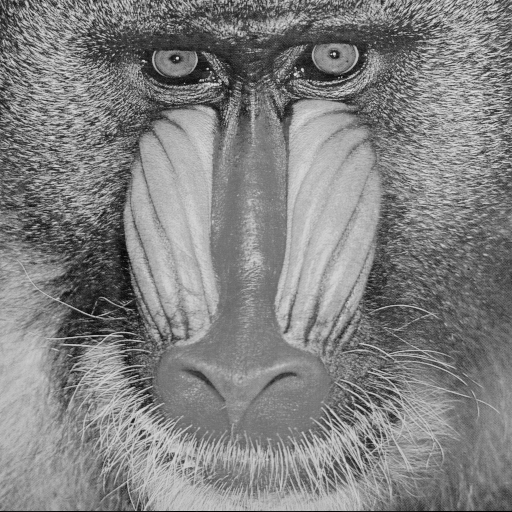

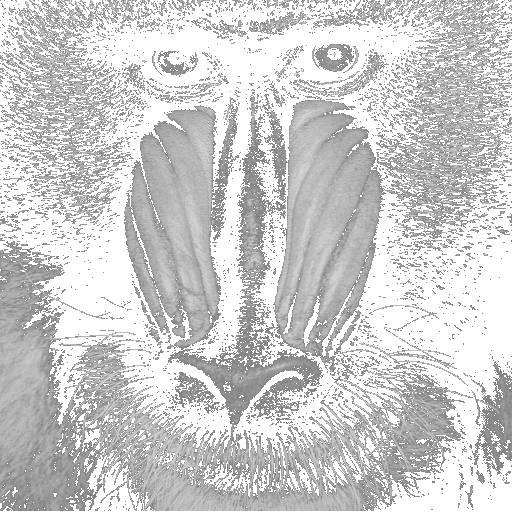

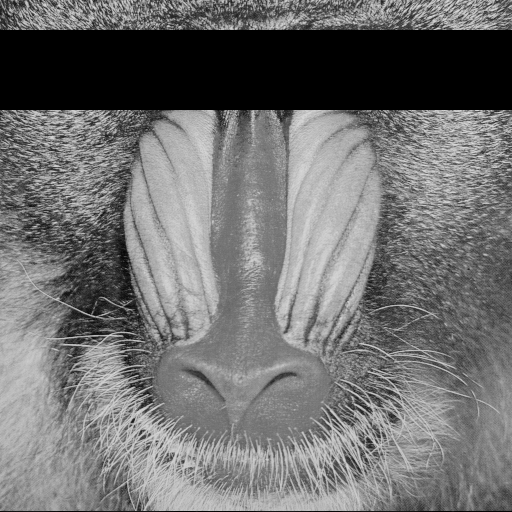

In [45]:
# グレースケール画像の操作
img_color = cv2.imread("sample/sample.jpg")
print("color (BGR): ",img_color.shape, ", type: ", img_color.dtype)

img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY) # グレイスケールに変換
print("grayscale: ",img_gray.shape, ", type: ", img_color.dtype)

# 各画素をスキャンして、条件にあった画素だけ書き換える（効率悪い。おそい。）
out1 = img_gray.copy()
out2 = img_gray.copy()
for y in range(img_gray.shape[0]):
  for x in range(img_gray.shape[1]):

    # 例1: 画素値が128よりも小さい場合に全部255（白）にする
    if out1[y,x] < 128:
      out1[y,x] = 255

    # 例2: y座標が30以上110未満の部分を黒塗り
    if 30 <= y < 110:
      out2[y,x] = 0

# 例1は、numpyを使って以下のようにも実現できる。はやい。
out_numpy = np.where(img_gray<128, 255, img_gray)
# 例2は、numpyの配列操作で以下のように書ける。はやい。
out2_numpy = img_gray.copy()
out2_numpy[30:110,:] = 0

imshow_inline(img_gray)
imshow_inline(out1)
imshow_inline(out2)

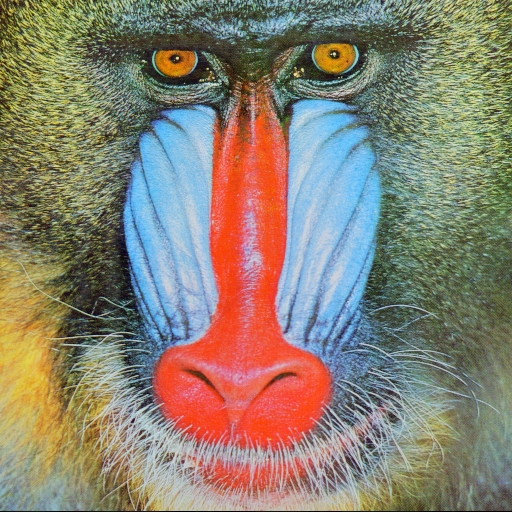

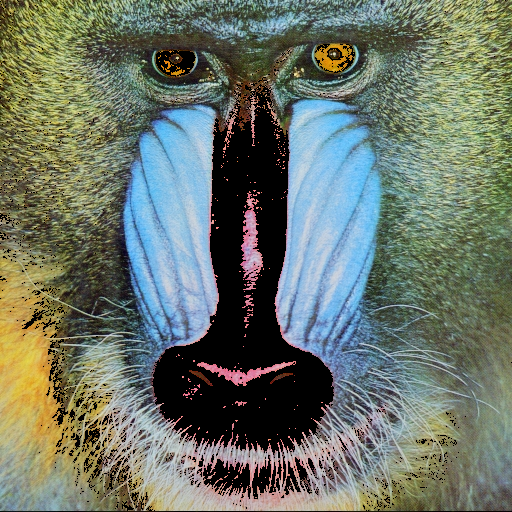

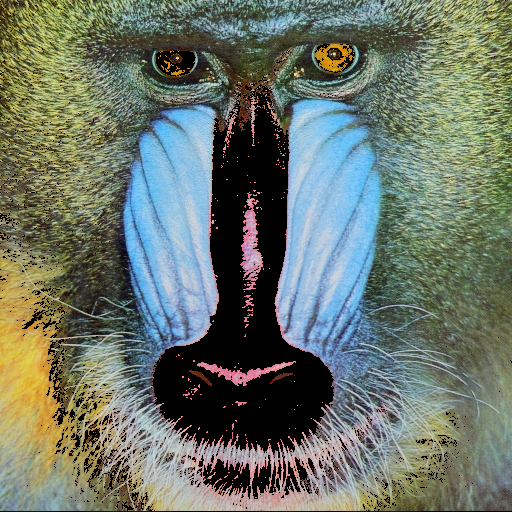

In [69]:
# カラー画像の操作
img = cv2.imread("sample/sample.jpg")

out = img.copy()
for y in range(img.shape[0]):
  for x in range(img.shape[1]):

    # R（赤成分）だけ大きい場合、黒(0,0,0)にする
    if img[y,x,0] < 128 and img[y,x,1] < 128 and img[y,x,2] > 128:
      out[y,x,0] = 0
      out[y,x,1] = 0
      out[y,x,2] = 0

# OpenCVとnumpyを使って以下のようにも書ける
out_numpy = img.copy()
mask = cv2.inRange(img, np.array([0,0,128]), np.array([128,128,255]))
mask = 255-mask # Rだけ大きい画素「以外」を残したいので
mask = np.dstack((mask,mask,mask))  # 3chにしたいので
out_numpy = cv2.bitwise_and(img, mask)
#out_numpy = img * (mask/255).astype(np.uint8)

imshow_inline(img)
imshow_inline(out)
imshow_inline(out_numpy)

## 画像の変形編
